In [1]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from livelossplot import PlotLossesKeras
from utils import *

In [2]:
electron_features, electron_labels = get_features_and_labels(file_dir = electron_dir)
photon_features, photon_labels = get_features_and_labels(file_dir = photon_dir)
features = np.concatenate((electron_features,photon_features), axis = 0)
labels = np.concatenate((electron_labels,photon_labels), axis = 0)

In [3]:
features, labels = shuffle(features, labels, random_state=42)

In [4]:
X_train, X_test_and_val, y_train, y_test_and_val = train_test_split(
    features,
    labels,
    test_size = 0.05,
    random_state=42
)
X_test, X_val, y_test, y_val = train_test_split(
    X_test_and_val, 
    y_test_and_val, 
    test_size=0.5, 
    random_state=42
)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(473100, 32, 32, 2)
(473100,)
(12450, 32, 32, 2)
(12450,)
(12450, 32, 32, 2)
(12450,)


In [7]:
model =  tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32,32,2)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',padding = 'same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding = 'same',  strides=(2,2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        608       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

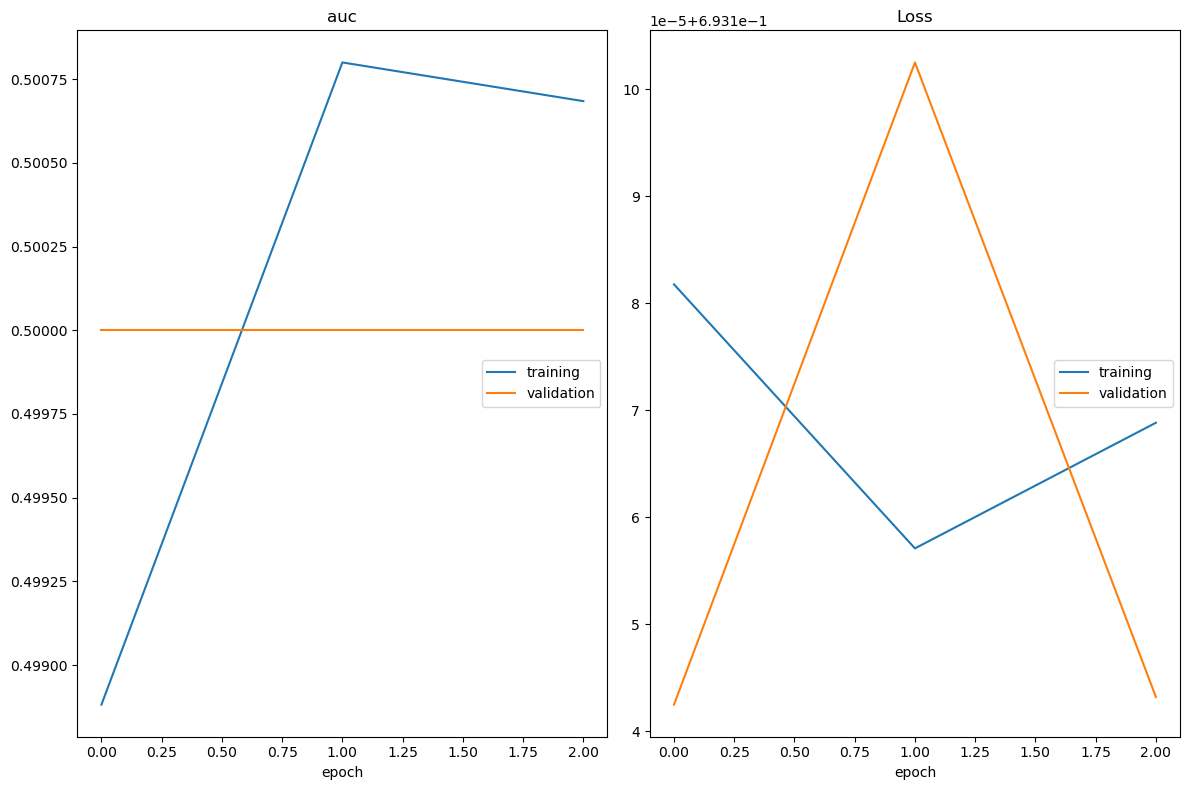

auc
	training         	 (min:    0.499, max:    0.501, cur:    0.501)
	validation       	 (min:    0.500, max:    0.500, cur:    0.500)
Loss
	training         	 (min:    0.693, max:    0.693, cur:    0.693)
	validation       	 (min:    0.693, max:    0.693, cur:    0.693)
7393/7393 [==============================] - 84s 11ms/step - loss: 0.6932 - auc: 0.5007 - val_loss: 0.6931 - val_auc: 0.5000
Epoch 4/30
4669/7393 [=================>............] - ETA: 30s - loss: 0.6932 - auc: 0.4998

KeyboardInterrupt: 

In [9]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss = 'binary_crossentropy', 
    metrics = [tf.keras.metrics.AUC()]
)
#lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
'''ckpt = tf.keras.callbacks.ModelCheckpoint(
    weights_path,
    monitor='val_auc',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    save_freq='epoch'
)'''
model.fit(
    X_train, 
    y_train,
    epochs = epochs,
    batch_size = batch_size,
    validation_data=(X_val, y_val),
    callbacks=[PlotLossesKeras()],
    verbose=1,
    shuffle=True
)
